In [41]:
import librosa
import sklearn
import librosa.display
import matplotlib.pylab as plt
import IPython.display as ipd

In [18]:
audio_path = '../data/wav/2-a_h.wav'
x, sr = librosa.load(audio_path)

In [19]:
ipd.Audio(audio_path)

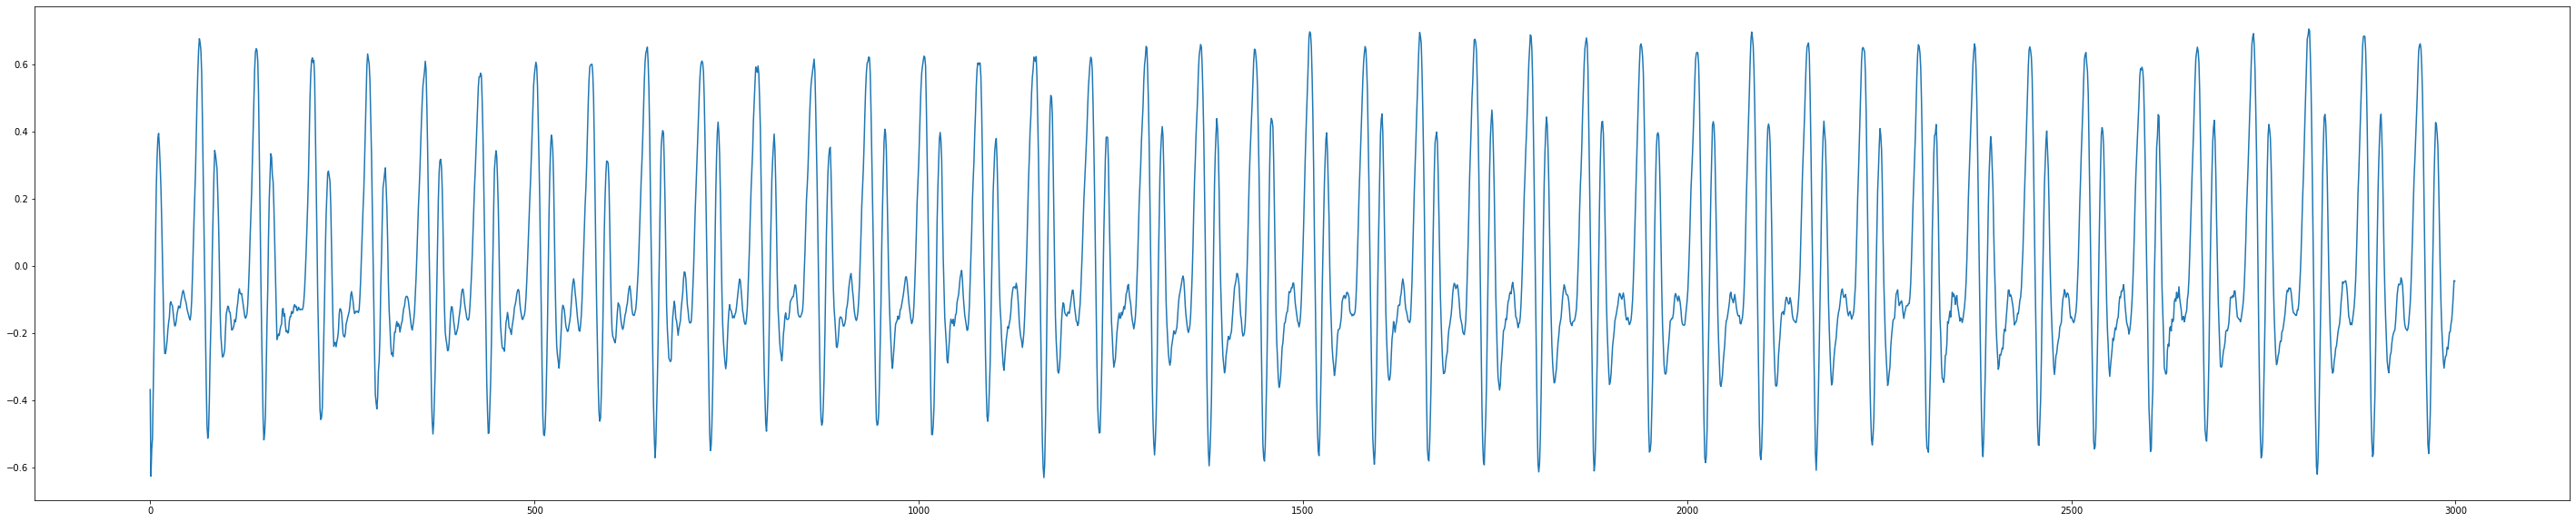

In [20]:
plt.figure(figsize=(50, 10))
plt.plot(x[0:3000])

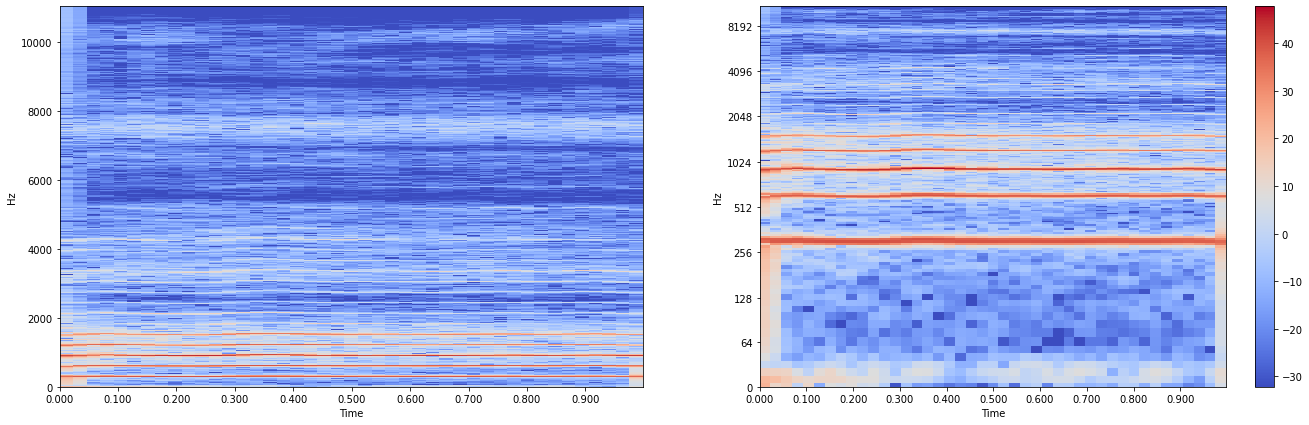

In [33]:
x_fourier = librosa.stft(x)
x_db = librosa.amplitude_to_db(abs(x_fourier))
plt.figure(figsize=(23, 7))
plt.subplot(1, 2, 1)
librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
plt.subplot(1, 2, 2)
librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [38]:
spectral_centroid = librosa.feature.spectral_centroid(x, sr=sr)[0]

In [39]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]

In [49]:
def plot_normalized(array):
    frames = range(len(array))
    t = librosa.frames_to_time(frames)

    normalized = sklearn.preprocessing.minmax_scale(array, axis=0)

    librosa.display.waveplot(x, sr=sr, alpha=0.8)
    plt.plot(t, normalized, color='r')
    plt.show()

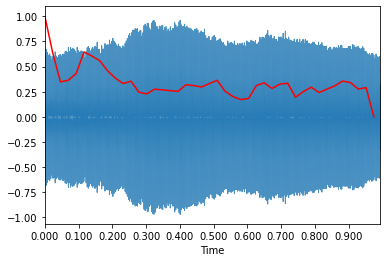

In [50]:
plot_normalized(spectral_centroid)

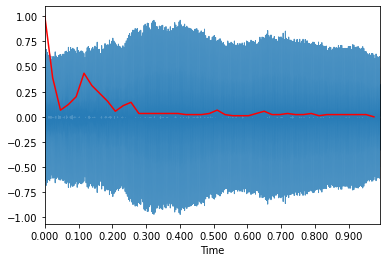

In [46]:
plot_normalized(spectral_rolloff)

(20, 43)


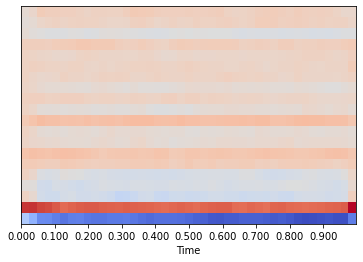

In [54]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')